## Challenge: Exercise 4

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Statistics about searches with bookings

In [2]:
import bz2
files_path = "/home/dsc/Repositories/Master-in-Data-Science/Data/"

##### Loading and formatting searches file

In [3]:
# Loading searches file
searches_file = bz2.BZ2File(files_path+"new_searches.csv.bz2")
searches_df = pd.read_csv(searches_file,sep='^',nrows=5e6, usecols=['Country','Date','Seg1Date','Is_Booked'])
searches_df = searches_df.dropna(subset=['Seg1Date'])

# Adding column with days between search and departure
searches_df['BookDate'] = pd.to_datetime(searches_df['Date'])
searches_df['DepDate'] = pd.to_datetime(searches_df['Seg1Date'])
searches_df['DiffDates'] = searches_df.DepDate-searches_df.BookDate
searches_df['DaysToDep'] = (pd.to_timedelta(searches_df['DiffDates'])/np.timedelta64(1, 'D')).astype(int)

##### Grouping by period search/departure

In [4]:
result_df = DataFrame(searches_df.groupby('DaysToDep')['Is_Booked'].sum())
result_df['TotSearched'] = searches_df.groupby('DaysToDep')['Is_Booked'].count()

# Adding column with rate_conversion
result_df['Rate_Conversion'] = result_df.Is_Booked/result_df.TotSearched*100
result_df.reset_index(inplace=True)
result_df.sort('DaysToDep',ascending=False,inplace=True)

#### Top searching days

In [5]:
mean_totsearched = result_df.TotSearched.mean()
result_df[['DaysToDep','TotSearched']].sort('TotSearched',ascending=False).head(10)

,DaysToDep,TotSearched
3,3,115349
1,1,108010
2,2,101145
7,7,99769
4,4,92520
14,14,88850
6,6,84544
5,5,84408
8,8,71505
10,10,70301


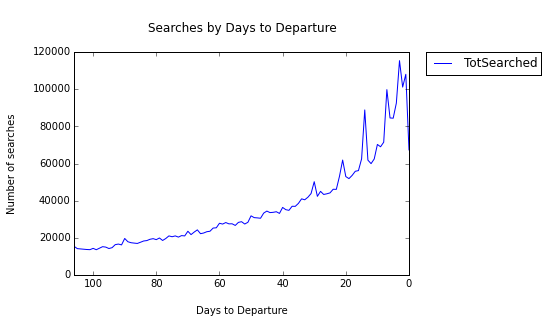

In [6]:
result_df[result_df['TotSearched'] > mean_totsearched ]['TotSearched'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.title("\nSearches by Days to Departure\n")
plt.xlabel("\nDays to Departure")
plt.ylabel("Number of searches\n")
plt.show()

#### Top searching days with booking

In [7]:
result_df.sort('Is_Booked',ascending=False).head(10)
result_df[['DaysToDep','Is_Booked']].sort('Is_Booked',ascending=False).head(10)

,DaysToDep,Is_Booked
3,3,10685
1,1,8247
4,4,7234
2,2,6989
5,5,6470
7,7,6385
6,6,5750
8,8,4869
14,14,4773
0,0,4617


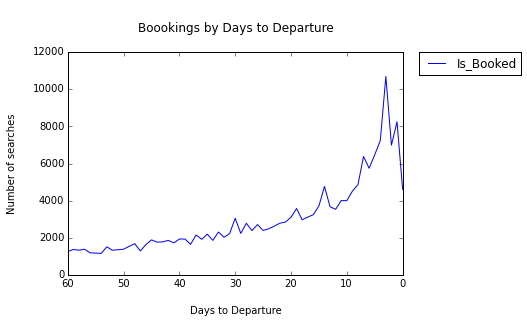

In [8]:
result_df[result_df['TotSearched'] > mean_totsearched*2]['Is_Booked'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.title("\nBoookings by Days to Departure\n")
plt.xlabel("\nDays to Departure")
plt.ylabel("Number of searches\n")
plt.show()

#### Top by rate_conversion searching days  

In [9]:
result_df[result_df.TotSearched > mean_totsearched][['DaysToDep','Rate_Conversion']].sort('Rate_Conversion',ascending=False).head(10)

,DaysToDep,Rate_Conversion
3,3,9.263193
4,4,7.818850
5,5,7.665150
1,1,7.635404
2,2,6.909882
19,19,6.903657
0,0,6.853707
8,8,6.809314
6,6,6.801192
9,9,6.543843


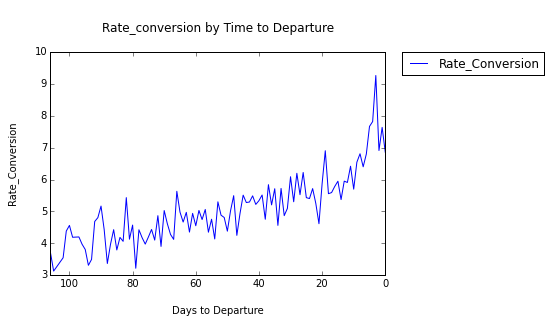

In [10]:
result_df[result_df['TotSearched'] > mean_totsearched ]['Rate_Conversion'].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.title("\nRate_conversion by Time to Departure\n")
plt.xlabel("\nDays to Departure")
plt.ylabel("Rate_Conversion\n")
plt.show()

### Statistics by Country

In [11]:
from GeoBases import GeoBase
geo_c = GeoBase(data='countries',verbose=False)

def change_name(s):
    if s=='UK':
        return 'GB'
    elif s=='XU':
        return 'RU'
    else:
        return s

In [12]:
result_df = DataFrame(searches_df.groupby('Country')['Is_Booked'].sum())
result_df['TotSearched'] = searches_df.groupby('Country')['Is_Booked'].count()
# Adding column with rate_conversion
result_df['Rate_Conversion'] = result_df.Is_Booked/result_df.TotSearched*100
# Adding column with average DaysToDep
result_df['DaysToDep'] = searches_df.groupby('Country')['DaysToDep'].mean()
result_df.reset_index(inplace=True)
# Adding column with country name
result_df['Country'] = result_df['Country'].apply(lambda n: change_name(n))
result_df['Country_Name'] = result_df['Country'].apply(lambda n: geo_c.get(n.strip(),'name'))


#### Top searching countries

In [13]:
mean_totsearched = result_df.TotSearched.mean()
result_df[['Country_Name','TotSearched']].sort('TotSearched',ascending=False).head(5)

,Country_Name,TotSearched
169,United States,1391725
41,Germany,657887
56,United Kingdom,347634
54,France,276183
48,Spain,255938


#### Top travelling countries

In [14]:
result_df[['Country_Name','Is_Booked']].sort('Is_Booked',ascending=False).head(5)

,Country_Name,Is_Booked
169,United States,65717
41,Germany,36148
142,Saudi Arabia,18750
56,United Kingdom,18076
48,Spain,13198


#### Top (and no) confident countries

Calculated as average of rate_conversion

In [15]:
result_df[result_df['TotSearched'] > mean_totsearched][['Country_Name','Rate_Conversion']].sort('Rate_Conversion',ascending=False).head(5)

,Country_Name,Rate_Conversion
142,Saudi Arabia,21.683319
6,Australia,13.907782
158,Thailand,10.570295
77,India,7.851185
29,Switzerland,5.694962


In [16]:
result_df[result_df['TotSearched'] > mean_totsearched][['Country_Name','Rate_Conversion']].sort('Rate_Conversion').head(5)

,Country_Name,Rate_Conversion
166,Ukraine,1.122264
140,Russia,1.590832
33,China,1.780556
21,Brazil,2.107007
81,Italy,2.338785


#### Top (and no) farsighted countries

Calculated as average of days to departure when search is done

In [17]:
result_df[result_df['TotSearched'] > mean_totsearched][['Country_Name','DaysToDep']].sort('DaysToDep',ascending=False).head(5)

,Country_Name,DaysToDep
56,United Kingdom,83.047774
6,Australia,80.492354
41,Germany,76.637125
42,Denmark,72.016684
169,United States,71.501803


In [18]:
result_df[result_df['TotSearched'] > mean_totsearched][['Country_Name','DaysToDep']].sort('DaysToDep').head(5)

,Country_Name,DaysToDep
142,Saudi Arabia,14.528784
166,Ukraine,48.489727
140,Russia,51.345573
77,India,52.151099
162,Turkey,57.081824
